# Synthetic Data Project
## Sponsored by the Western PA Regional Center
### Declan Kelly, Andrew Fox, Jack Kaye
## Project Objective
To analyze synthetic data and understand the protections it provides for privacy and the different limitations it has.
We will work to answer the following questions:
1. What type of conclusions can you draw from the synthetic dataset that was not available from the aggregate count data? 
2. How consistent are the aggregates from synthetic data with those reported by the county?
3. What is the underlying procedure for generating the synthetic datasets? 
4. Are you convinced of its utility and privacy guarantees that it provide to individuals?

The Synthetic dataset of with alleghany service records was too large of a file to push onto the github so it must be downloaded after pulled. 

In [135]:
# Loading in all necessary packages
import pandas as pd
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from faker import Faker
fake = Faker()
from sklearn import metrics

## Cleaning, importing, and setting up the data


In [216]:
# Municipality Data
Municipality = '../../data-for-good/Project1/Municipality_Profiles.csv'
df_Municipality = pd.read_csv(Municipality, usecols = ['_id','metric_name','report_group','calendar_year', 'kpi_count','geo_area_name','population_name', 'kpi_population'])
df_Municipality

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name,population_name,kpi_population
0,559714,Overdoses,Community Trends,2017.0,NaN,Aleppo,Total Population,1849.0
1,559715,Overdoses,Community Trends,2018.0,NaN,Aleppo,Total Population,1849.0
2,559716,Overdoses,Community Trends,2019.0,NaN,Aleppo,Total Population,1849.0
3,559717,Overdoses,Community Trends,2020.0,NaN,Aleppo,Total Population,1849.0
4,559718,Overdoses,Community Trends,2021.0,NaN,Aleppo,Total Population,1849.0
...,...,...,...,...,...,...,...,...
17288,577002,Older Adults Receiving Services,Population Served by DHS,2019.0,511.0,X-Unassigned,Adults 60 and Over,NaN
17289,577003,Older Adults Receiving Services,Population Served by DHS,2020.0,313.0,X-Unassigned,Adults 60 and Over,NaN
17290,577004,Older Adults Receiving Services,Population Served by DHS,2021.0,258.0,X-Unassigned,Adults 60 and Over,NaN
17291,577005,Older Adults Receiving Services,Population Served by DHS,2022.0,282.0,X-Unassigned,Adults 60 and Over,NaN


In [217]:
OverdoseReal = '../../data-for-good/Project1/OverdosesReal.csv'
df_OverdoseReal = pd.read_csv(OverdoseReal, usecols = ['_id','manner_of_death','age','sex','race','combined_od1','combined_od2','combined_od3','combined_od4','combined_od5','combined_od6','combined_od7','combined_od8','combined_od9','combined_od10','case_year','incident_zip'])
df_OverdoseReal.head()

,_id,manner_of_death,age,sex,race,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,case_year
0,6989080,Accident,35,F,W,Alcohol,Codeine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15216,2007
1,6989081,Accident,57,M,W,Diazepam,Fentanyl,Methadone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15224,2007
2,6989082,Accident,29,M,W,Cocaine,Fentanyl,Morphine,Oxycodone,NaN,NaN,NaN,NaN,NaN,NaN,15226,2007
3,6989083,Accident,60,F,W,Cocaine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15220,2007
4,6989084,Accident,45,M,W,Diazepam,Hydrocodone,Mirtazapine,Oxycodone,Trazodone,NaN,NaN,NaN,NaN,NaN,15068,2007


In [4]:
ServiceRecords = '../../data-for-good/Project1/ServiceRecords_SyntheticData.csv'
df_ServiceRecordsSynthetic = pd.read_csv(ServiceRecords, usecols = ['MCI_UNIQ_ID','CALDR_YR','DATE_OF_EVENT','service','GEO_AREA','age','DOB','DOD','GENDER','RACE','ETHNICITY','MARITAL_STATUS','EDUCATION_LEVEL'])
#df_ServiceRecordsSynthetic = pd.read_csv(ServiceRecords, usecols = ['MCI_UNIQ_ID','CALDR_YR','DATE_OF_EVENT','service', 'GEO_AREA','age','DOB','DOD', 'GENDER','RACE','ETHNICITY'])
df_ServiceRecordsSynthetic.head()

,MCI_UNIQ_ID,CALDR_YR,DATE_OF_EVENT,service,GEO_AREA,age,DOB,DOD,GENDER,RACE,ETHNICITY,MARITAL_STATUS,EDUCATION_LEVEL
0,1626,2021,01/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
1,1626,2021,02/28/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
2,1626,2021,03/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
3,1626,2021,04/30/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
4,1626,2021,05/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)


In [5]:
df_Age = df_OverdoseReal['age']
df_Age.head()

0    35
1    57
2    29
3    60
4    45
Name: age, dtype: int64

In [6]:
# Code to get values
## Explores age range - found uninterpretable variable
#df['Age Range'].value_counts(dropna=False)

df_ServiceRecordsSynthetic['service'].value_counts()

Individuals_Receiving_Income_Supports                         5450993
Individuals_Receiving_DHS_Services                             626722
Individuals_Receiving_Mental_Health_Services                   324241
Individuals_Receiving_Homelessness_and_Housing_Services        148968
Older_Adults_Receiving_Services                                131153
Individuals_Receiving_Substance_Use_Disorder_Services           74737
Individuals_Receiving_Intellectual_Disability_Services          74145
Parents_Receiving_Child_Welfare_Services                        54035
Children_Receiving_Child_Welfare_Services                       50373
Children_Receiving_Early_Intervention_Services                  45923
Individuals_Receiving_Family_Strengthening_Programs             28110
Jail_Population                                                 26987
Families_Receiving_Child_Welfare_Services                       23473
Children_in_Care                                                18442
Homeless_Population 

In [7]:
# Putting the Count data into a dataframe that can be used

SyntheticServiceRecord_Counts = df_ServiceRecordsSynthetic['service'].value_counts().reset_index().rename(columns={'Index': 'Service' 'SyntheticCount'})
SyntheticServiceRecord_Counts.columns = ['Service', 'SyntheticCount']

SyntheticServiceRecord_Counts.head()


,Service,SyntheticCount
0,Individuals_Receiving_Income_Supports,5450993
1,Individuals_Receiving_DHS_Services,626722
2,Individuals_Receiving_Mental_Health_Services,324241
3,Individuals_Receiving_Homelessness_and_Housing...,148968
4,Older_Adults_Receiving_Services,131153


In [8]:
# Real Data

RealCountData = '../../data-for-good/Project1/RealCountData.csv'
df_RealCountData = pd.read_csv(RealCountData, usecols = ['Service', 'RealCount'])
df_RealCountData.head()

#df_RealCountData.describe()
df_RealCountData.dtypes['RealCount']

dtype('int64')

In [249]:
# Merging Real count and Synthetic

Compare = pd.merge(SyntheticServiceRecord_Counts, df_RealCountData, how='left', on='Service')
Compare.head()


,Service,SyntheticCount,RealCount
0,Individuals_Receiving_Income_Supports,5450993,506910
1,Individuals_Receiving_DHS_Services,626722,90346
2,Individuals_Receiving_Mental_Health_Services,324241,59958
3,Individuals_Receiving_Homelessness_and_Housing...,148968,22618
4,Older_Adults_Receiving_Services,131153,36663


In [10]:
Neighborhoods = '../../data-for-good/Project1/Neighborhood_Profiles.csv'
df_Neighborhoods = pd.read_csv(Neighborhoods, usecols = ['_id','metric_name','report_group','calendar_year','kpi_count','geo_area_name'])
df_Neighborhoods.head()

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name
0,370459,Overdoses,Community Trends,2018,NaN,Allegheny Center
1,370460,Overdoses,Community Trends,2019,NaN,Allegheny Center
2,370461,Overdoses,Community Trends,2020,NaN,Allegheny Center
3,370462,Overdoses,Community Trends,2021,NaN,Allegheny Center
4,370463,Overdoses,Community Trends,2022,NaN,Allegheny Center


## What type of conclusions can you draw from the synthetic dataset that was not available from the aggregrate count data?
### About the data

The aggregate count data shows the total count of a given service in each year from 2018 to 2023 for every Pittsburgh neighborhood and Allegheny County municipality. It also provides the total population of the region and divides the counts into age ranges such as Under 18 and Under 35. The synthetic dataset relates to these same types of services, but it lists every individual case of a service being required. Therefore, it includes the date of the event and personal details such as age, race, gender, and education level.

### Actions taken
The start of this section details the difference between the type of data for synthetic and real data. The synthetic data is able to give us an age for each individual case and we can provide a histogram from that information. The real data only gives a wider range of ages to ensure privacy which can be formed in a bar chart. You can get a more granular understanding of the data from looking at the synthetic that you can not get from the real. The real data also does not have any information on race or ethnicity, which the synthetic data has. So with the synthetic data, we are able to gain a better picture of overall type of person that needed each service. 
One of the biggest differences between the synthetic data and real data is that the synthetic data included no information on the geo area of each service. With social service projects, understanding where resources need to be allocated is essential for the funding of many programs. Using the real data, we are able to identify the areas within Pittsburgh that need the most help with specific services.  

In [218]:
df_Municipality.head()

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name,population_name,kpi_population
0,559714,Overdoses,Community Trends,2017.0,NaN,Aleppo,Total Population,1849.0
1,559715,Overdoses,Community Trends,2018.0,NaN,Aleppo,Total Population,1849.0
2,559716,Overdoses,Community Trends,2019.0,NaN,Aleppo,Total Population,1849.0
3,559717,Overdoses,Community Trends,2020.0,NaN,Aleppo,Total Population,1849.0
4,559718,Overdoses,Community Trends,2021.0,NaN,Aleppo,Total Population,1849.0


In [219]:

df_Municipality = df_Municipality[(df_Municipality['population_name'] != 'Total Population')]
df_Municipality.head()

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name,population_name,kpi_population
1572,561286,Children in Care,Community Trends,2017.0,NaN,Aleppo,Children Under 18,218.0
1573,561287,Children in Care,Community Trends,2018.0,NaN,Aleppo,Children Under 18,218.0
1574,561288,Children in Care,Community Trends,2019.0,NaN,Aleppo,Children Under 18,218.0
1575,561289,Children in Care,Community Trends,2020.0,NaN,Aleppo,Children Under 18,218.0
1576,561290,Children in Care,Community Trends,2021.0,NaN,Aleppo,Children Under 18,218.0


In [220]:
df_ServiceRecordsSynthetic.head()

,MCI_UNIQ_ID,CALDR_YR,DATE_OF_EVENT,service,GEO_AREA,age,DOB,DOD,GENDER,RACE,ETHNICITY,MARITAL_STATUS,EDUCATION_LEVEL
0,1626,2021,01/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
1,1626,2021,02/28/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
2,1626,2021,03/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
3,1626,2021,04/30/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
4,1626,2021,05/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)


Text(0.5, 0, 'Ages')

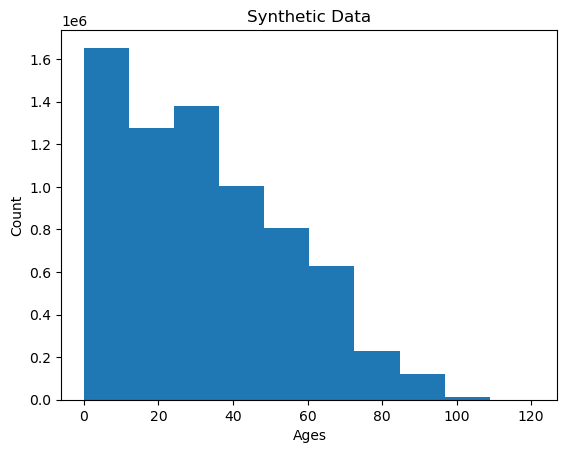

In [221]:
# Age histogram

plt.hist(df_ServiceRecordsSynthetic['age'])
plt.title('Synthetic Data')
plt.ylabel('Count')
plt.xlabel('Ages')

In [222]:
barchartMunicipality = df_Municipality['population_name'].value_counts()

In [223]:
barchartMunicipality.head()

Children Under 18                                    2358
Individuals 15 and Over                              2358
Adults 18 and Over                                    786
Households with One or More People Under 18 Years     786
Children Under 3                                      786
Name: population_name, dtype: int64

<Axes: title={'center': 'Municipality Ages Bar Chart'}>

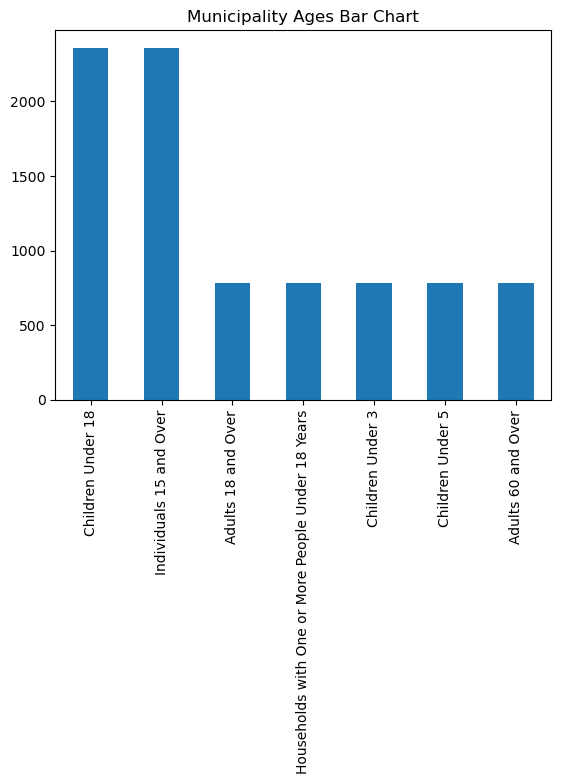

In [224]:
BarChart_Municipality = df_Municipality['population_name'].value_counts().reset_index().rename(columns={'Index': 'Population'})
dfBarChart_Municipality = BarChart_Municipality.columns = ['Population', 'Count']


barchartMunicipality.plot(x= 'Population', y =['Count'], kind = 'bar', title = 'Municipality Ages Bar Chart')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1~White'),
  Text(1, 0, '99~Unknown'),
  Text(2, 0, '2~Black/African American'),
  Text(3, 0, '4~Asian'),
  Text(4, 0, '7~Other Single Race'),
  Text(5, 0, '6~Two or More Races'),
  Text(6, 0, '5~Native American/Pacific Islander')])

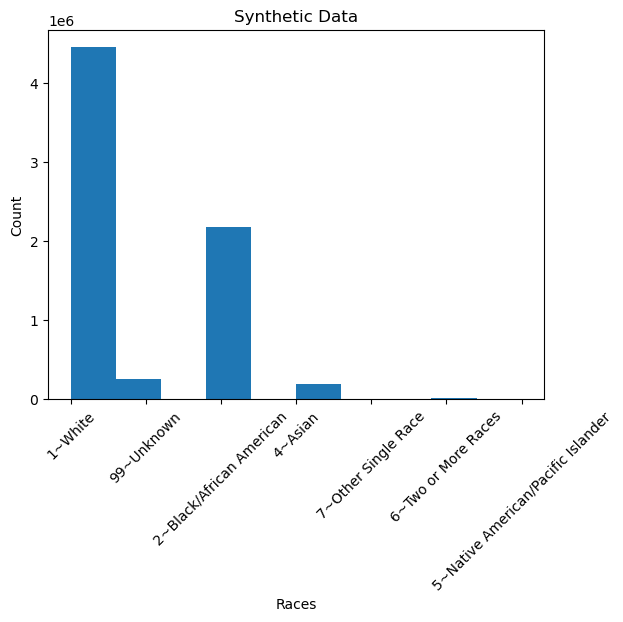

In [225]:
# Race histogram - this needs to be a bar graph

plt.hist(df_ServiceRecordsSynthetic['RACE'])
plt.title('Synthetic Data')
plt.ylabel('Count')
plt.xlabel('Races')
plt.xticks(rotation=45)

Text(0.5, 0, 'Races')

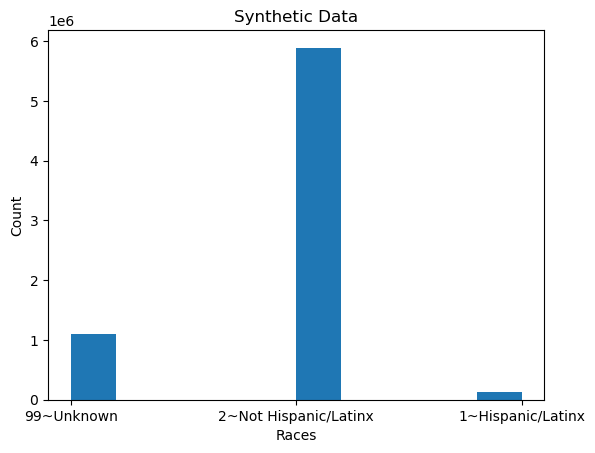

In [226]:
# Ethnicity histogram - this needs to be a bar graph

plt.hist(df_ServiceRecordsSynthetic['ETHNICITY'])
plt.title('Synthetic Data')
plt.ylabel('Count')
plt.xlabel('Races')
#plt.xticks(rotation=45)

In [227]:
# Synthetic Data can give a very general overview 


df_ServiceRecordsSynthetic1 = pd.read_csv(ServiceRecords, usecols = ['CALDR_YR','service','GEO_AREA','age','DOD','GENDER','RACE','ETHNICITY','MARITAL_STATUS','EDUCATION_LEVEL'])
df_ServiceRecordsSynthetic1.isna().sum()

# This shows that every value that in terms of location is missing, so it would be hard to determine where to allocate resources using synthetic data


CALDR_YR                 0
service                  0
GEO_AREA           7116134
age                      0
DOD                7116134
GENDER                   0
RACE                     0
ETHNICITY                0
MARITAL_STATUS           0
EDUCATION_LEVEL          0
dtype: int64

In [228]:
#df_Municipality.head()

df_Municipality['geo_area_name'].value_counts()

Aleppo                66
Scott                 66
Ross                  66
Robinson              66
Richland              66
                      ..
Etna                  66
Emsworth              66
Elizabeth Township    66
Elizabeth Borough     66
X-Unassigned          66
Name: geo_area_name, Length: 131, dtype: int64

In [230]:
df_Municipality.head()

df_Municipality = df_Municipality.dropna()
df_Municipality.head()
df_Municipality['Density'] = df_Municipality['kpi_count']/df_Municipality['kpi_population']
df_Municipality.head()

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name,population_name,kpi_population,Density
1586,561300,Children in Care,Community Trends,2019.0,13.0,Avalon,Children Under 18,690.0,0.018841
1587,561301,Children in Care,Community Trends,2020.0,12.0,Avalon,Children Under 18,690.0,0.017391
1588,561302,Children in Care,Community Trends,2021.0,14.0,Avalon,Children Under 18,690.0,0.020290
1589,561303,Children in Care,Community Trends,2022.0,12.0,Avalon,Children Under 18,690.0,0.017391
1590,561304,Children in Care,Community Trends,2017.0,19.0,Baldwin Borough,Children Under 18,4057.0,0.004683


In [231]:
# Figure out what areas need the most help based on raw data - unable to do this with synthetic

df_Municipality.groupby(['geo_area_name']).max()

,_id,metric_name,report_group,calendar_year,kpi_count,population_name,kpi_population,Density
geo_area_name,,,,,,,,
Aleppo,576224,Older Adults Receiving Services,Population Served by DHS,2022.0,13.0,Individuals 15 and Over,1632.0,0.391304
Aspinwall,576231,Parents Receiving Child Welfare Services,Population Served by DHS,2022.0,38.0,Individuals 15 and Over,2188.0,0.194915
Avalon,576237,Parents Receiving Child Welfare Services,Population Served by DHS,2022.0,158.0,Individuals 15 and Over,4113.0,0.150000
Baldwin Borough,576243,Parents Receiving Child Welfare Services,Population Served by DHS,2022.0,586.0,Individuals 15 and Over,16437.0,0.209169
Baldwin Township,576248,Older Adults Receiving Services,Population Served by DHS,2022.0,26.0,Individuals 15 and Over,1756.0,0.214286
...,...,...,...,...,...,...,...,...
White Oak,576975,Parents Receiving Child Welfare Services,Population Served by DHS,2022.0,289.0,Individuals 15 and Over,6573.0,0.196429
Whitehall,576981,Parents Receiving Child Welfare Services,Population Served by DHS,2022.0,370.0,Individuals 15 and Over,11484.0,0.178964
Wilkins,576987,Parents Receiving Child Welfare Services,Population Served by DHS,2022.0,192.0,Individuals 15 and Over,5581.0,0.596774


In [232]:

#df_Municipality.groupby(['metric_name']).sort_values(by = ['geo_area_name'], ascending = False)

idx = df_Municipality.groupby('metric_name')['Density'].idxmax()
print(idx)

#Oldest_to_youngest2 = Overdoses_deeperlook.sort_values(by = 'age', ascending = False)
#print(Oldest_to_youngest2.head(5))
#print(Oldest_to_youngest2.tail(5))

metric_name
Children Attending Early Childhood Programs Managed by DHS    11077
Children Receiving Child Welfare Services                      7934
Children Receiving DHS-Funded Out of School Programs          11984
Children Receiving Early Intervention Services                10291
Children in Care                                               2321
Families Receiving Child Welfare Services                      9504
Homeless Population                                            4122
Individuals Receiving Substance Use Disorder Services         15009
Jail Population                                                4788
Older Adults Receiving Services                               16837
Parents Receiving Child Welfare Services                       8839
Name: Density, dtype: int64


In [233]:
# Finding the township that needs the most help in each category, maybe go back and determine a ratio or filter to get other townships besides pittsburgh 
# Could group by year in the future as well

idx = df_Municipality.groupby('metric_name')['Density'].idxmax()
township_most_help = df_Municipality.loc[idx]



Help = township_most_help[['metric_name', 'population_name','geo_area_name']]
print(Help)


                                             metric_name  \
11077  Children Attending Early Childhood Programs Ma...   
7934           Children Receiving Child Welfare Services   
11984  Children Receiving DHS-Funded Out of School Pr...   
10291     Children Receiving Early Intervention Services   
2321                                    Children in Care   
9504           Families Receiving Child Welfare Services   
4122                                 Homeless Population   
15009  Individuals Receiving Substance Use Disorder S...   
4788                                     Jail Population   
16837                    Older Adults Receiving Services   
8839            Parents Receiving Child Welfare Services   

                                         population_name    geo_area_name  
11077                                   Children Under 5         Braddock  
7934                                   Children Under 18         Braddock  
11984                                  Children Und

In [200]:
df_Neighborhoods.isna().sum()
df_Neighborhoods = df_Neighborhoods.dropna()
df_Neighborhoods.isna().sum()

_id              0
metric_name      0
report_group     0
calendar_year    0
kpi_count        0
geo_area_name    0
dtype: int64

In [236]:

df_Neighborhoods.head()


,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name
15,370474,Overdoses,Community Trends,2021,7.0,Allentown
17,370476,Overdoses,Community Trends,2023,6.0,Allentown
41,370500,Overdoses,Community Trends,2023,6.0,Bedford Dwellings
44,370503,Overdoses,Community Trends,2020,8.0,Beechview
45,370504,Overdoses,Community Trends,2021,7.0,Beechview


In [27]:
# Finding the Neighborhood in Pittsburgh that needs the most help in each respective category
# Can't use synthetic data to find this answer

idx1 = df_Neighborhoods1.groupby('metric_name')['kpi_count'].idxmax()
township_most_help = df_Municipality.loc[idx1]

Help = township_most_help[['metric_name', 'population_name','geo_area_name']]
print(Help)

                                             metric_name  \
7243                  Individuals Receiving DHS Services   
7717                  Individuals Receiving DHS Services   
6749               Individuals Receiving Income Supports   
5352                                     Jail Population   
1266                                            Suicides   
6287                                           Homicides   
2738                                Mental Health Crises   
3932                                 Homeless Population   
4809                                     Jail Population   
8154           Children Receiving Child Welfare Services   
10156          Families Receiving Child Welfare Services   
4265                                 Homeless Population   
8535           Children Receiving Child Welfare Services   
9062            Parents Receiving Child Welfare Services   
9610           Families Receiving Child Welfare Services   
2165                                    

In [28]:
# KNN test
df_ServiceRecordsSynthetic1 = pd.read_csv(ServiceRecords, usecols = ['service','age','GENDER','RACE','ETHNICITY','MARITAL_STATUS','EDUCATION_LEVEL'])
df_ServiceRecordsSynthetic1.head()

,service,age,GENDER,RACE,ETHNICITY,MARITAL_STATUS,EDUCATION_LEVEL
0,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
1,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
2,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
3,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
4,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)


## How consistent are the aggregates from synthetic data with those reported by the county?
### About the data
The data used in this section was the synthetic data of services in allegheny county. Then we counted how many times each service was within the data and created a dataframe from that aggregrate count data. We also used the aggregate count data given to us about the services, this data was real. We merged the two data sets together to form to be able to compare the data. Both datasets were from the year 2021. 

### Actions taken
To see the consistency between the synthetic and aggregate data we merged the aggregate count data and the count data from the synthetic dataframe. After merging the two datasets, we created a plot compating the the Synthetic Count and Real Count for each service. When doing this we saw that the Synthetic Count seemed to overshot the real count especially for Individuals recieving Income Supports. To see how if both count data sets follow the same trend, a log scale graph of the dataframe was created. Using that plot we can see the how both the Real and Synthetic Count data follow the same trends. We realized that the reason that Individuals Receiving Income Supports has high was because that is a service that was counted each month instead of each year. So we tried to divide that number by 12, but doing this the Synthetic Count was really small. We feel that is could be because not everyone may request this service. To look further into the data, we looked decided to remove the Individuals Receiving Income Supports completely and do the same process. As expected, we find a very similar trend doing this. We feel that this code shows how Synthetic data over shoots the real data a bit, but follows the same trends as the aggregate data. 

<Axes: xlabel='Service'>

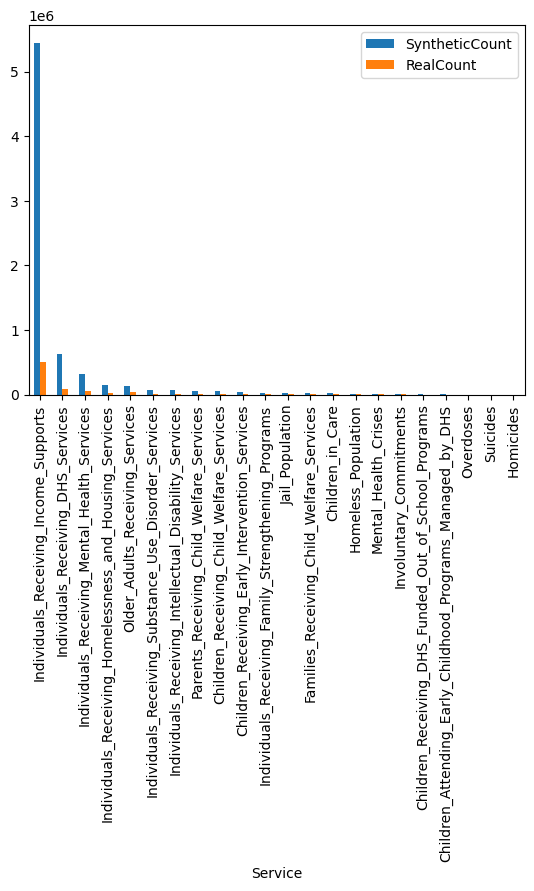

In [250]:
# Comparision of the Data Sets


#Compare.SyntheticCount.plot(kind='bar', color='red', ax=ax, width=width, position = 1)
#Compare.RealCount.plot(kind='bar', color='blue', ax=ax2, width=width, position = 0)

# Plot Graph

Compare.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'bar')


In [30]:
# Dropping the first row from the dataframe, so graph easier to look at

Compare.head()
Row1 = Compare['Service'] == 'Individuals_Receiving_Income_Supports'
Compare1 = Compare[~Row1]
Compare1.head()


,Service,SyntheticCount,RealCount
1,Individuals_Receiving_DHS_Services,626722,90346
2,Individuals_Receiving_Mental_Health_Services,324241,59958
3,Individuals_Receiving_Homelessness_and_Housing...,148968,22618
4,Older_Adults_Receiving_Services,131153,36663
5,Individuals_Receiving_Substance_Use_Disorder_S...,74737,14094


Text(0, 0.5, 'Total Count')

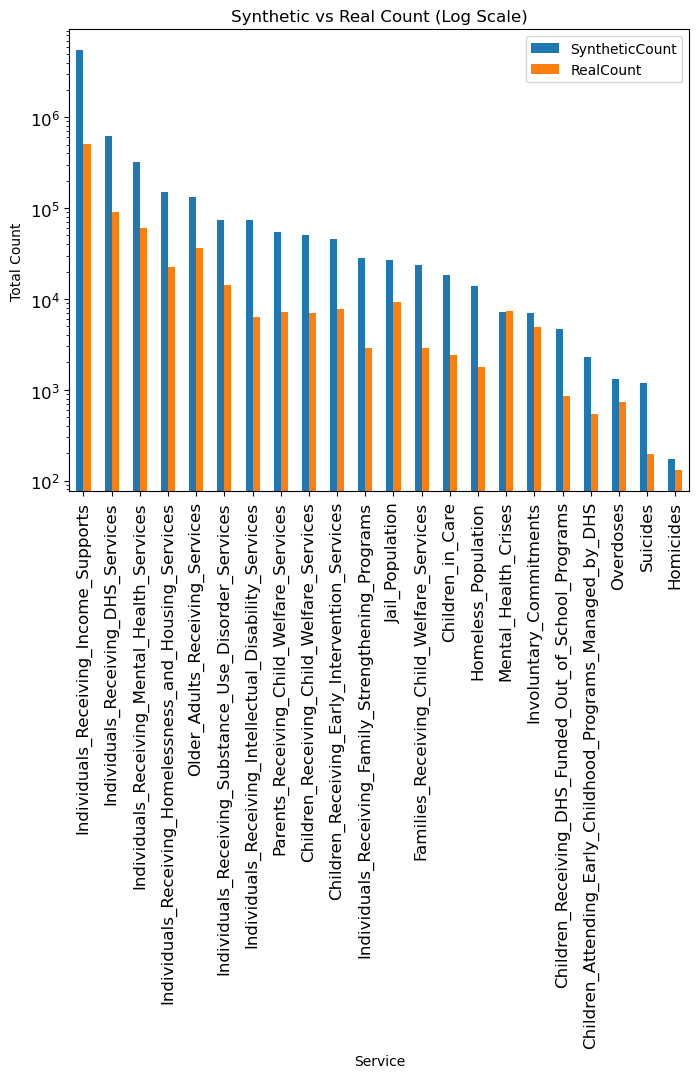

In [31]:
# Testing with Log Scale

ax = Compare.plot( x = 'Service', y= ['SyntheticCount', 'RealCount'], kind = 'bar', figsize=(8,6), title = 'Synthetic vs Real Count (Log Scale)', logy=True, fontsize=12)
ax.set_ylabel('Total Count')

In [238]:
626722/12

52226.833333333336

In [239]:
Compare.head()

,Service,SyntheticCount,RealCount
0,Individuals_Receiving_Income_Supports,5450993,506910
1,Individuals_Receiving_DHS_Services,626722,90346
2,Individuals_Receiving_Mental_Health_Services,324241,59958
3,Individuals_Receiving_Homelessness_and_Housing...,148968,22618
4,Older_Adults_Receiving_Services,131153,36663


In [251]:
row = Compare.index[Compare['Service'] == 'Individuals_Receiving_Income_Supports'][0]
column = 'SyntheticCount'
value = 626722/12
Compare.at[row, column] = value
Compare.head()

,Service,SyntheticCount,RealCount
0,Individuals_Receiving_Income_Supports,52226.833333,506910
1,Individuals_Receiving_DHS_Services,626722.000000,90346
2,Individuals_Receiving_Mental_Health_Services,324241.000000,59958
3,Individuals_Receiving_Homelessness_and_Housing...,148968.000000,22618
4,Older_Adults_Receiving_Services,131153.000000,36663


<Axes: xlabel='Service'>

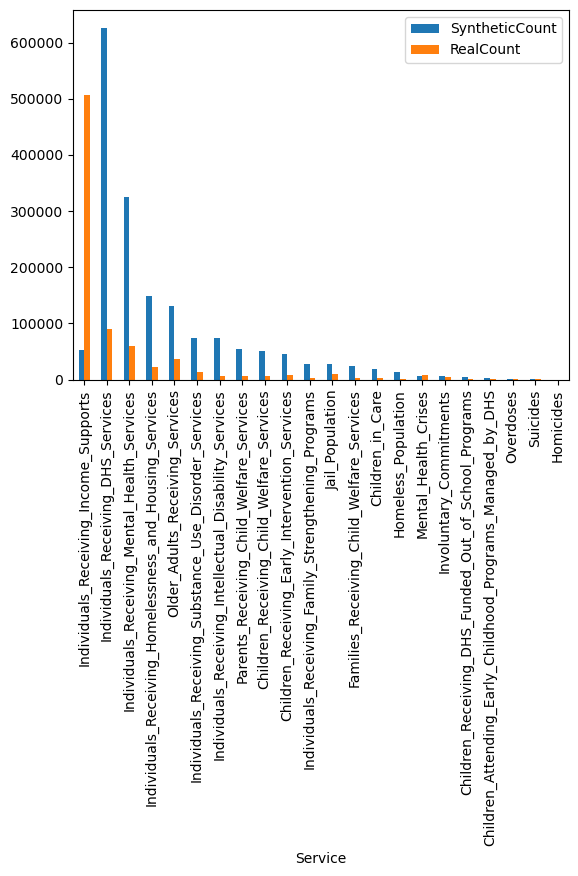

In [252]:
Compare.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'bar')


<Axes: xlabel='Service'>

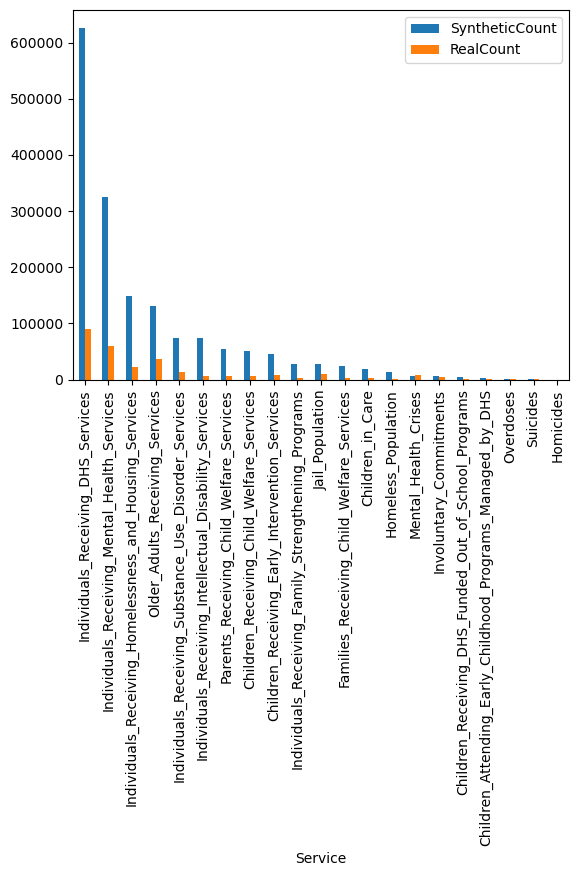

In [32]:
# Plotting without the first row to see what the true comparison of the data

# Plotting bar Graph

Compare1.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'bar')

# Synthetic Data is overshooting by a lot


Text(0, 0.5, 'Total Count')

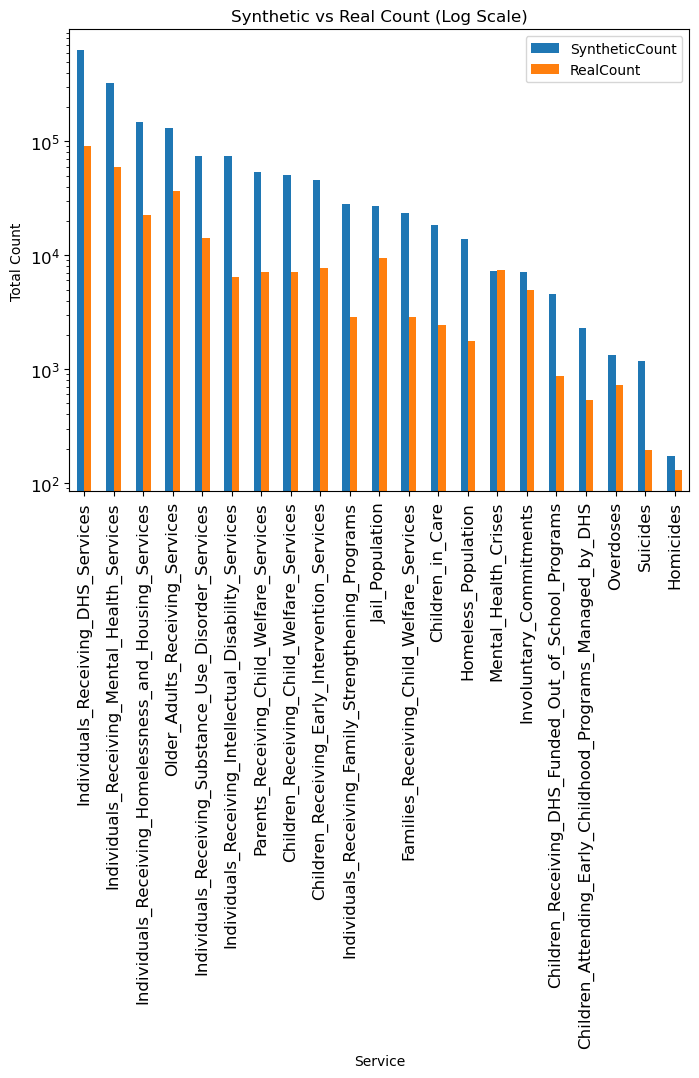

In [33]:
# Testing with Log Scale

ax = Compare1.plot( x = 'Service', y= ['SyntheticCount', 'RealCount'], kind = 'bar', figsize=(8,6), title = 'Synthetic vs Real Count (Log Scale)', logy=True, fontsize=12)
ax.set_ylabel('Total Count')

In [34]:
Compare.head()

,Service,SyntheticCount,RealCount
0,Individuals_Receiving_Income_Supports,5450993,506910
1,Individuals_Receiving_DHS_Services,626722,90346
2,Individuals_Receiving_Mental_Health_Services,324241,59958
3,Individuals_Receiving_Homelessness_and_Housing...,148968,22618
4,Older_Adults_Receiving_Services,131153,36663


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(-2.5, 0, ''),
  Text(0.0, 0, 'Individuals_Receiving_DHS_Services'),
  Text(2.5, 0, ''),
  Text(5.0, 0, 'Individuals_Receiving_Intellectual_Disability_Services'),
  Text(7.5, 0, ''),
  Text(10.0, 0, 'Jail_Population'),
  Text(12.5, 0, ''),
  Text(15.0, 0, 'Involuntary_Commitments'),
  Text(17.5, 0, ''),
  Text(20.0, 0, 'Homicides'),
  Text(22.5, 0, '')])

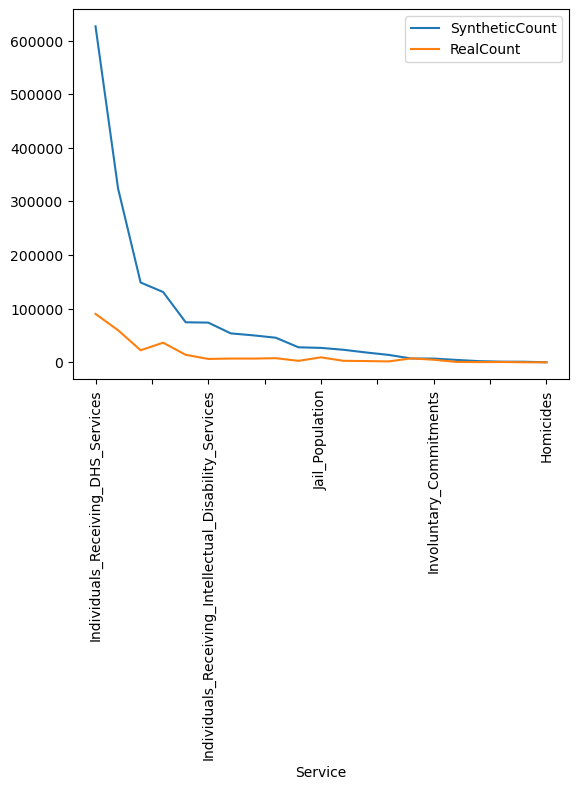

In [35]:
# Basic Line Plot

Compare1.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'line')
plt.xticks(rotation=90)


# Relatively similar in comparison to each other, Based on this data would still know where and how to allocate resources

## What is the underlying procedure for generating the synthetic datasets? 
### About the data
The data used in this was a made up dataset with pretend weights and ages of people. 

### Actions taken
Using the made up dataset, we wanted to go through the basic process of producing sythetic data. To create the synthetic data, we created a histograms of all the ages in the dataframe. After creating the histogram, we thought the data looked realatively normal, and we were able to match the data with a high enough p-value. After fitting the data to the distribution, we generated random values using the distribution. Then we fit age and weights given in the dataframe and completed a linear regression of the data. Using the coefficients and intercept from the linear regression we predicted the values of weight based off the randomly generated values. Doing this we created a synthetic version of the original dataframe. We can now use that new sythetic dataframe to do analysis on the data while keeping the privacy of people.  


In [36]:
fake.name()

'Andrea Johnson'

In [37]:
# Synthetic data
SyntheticTry = '../../data-for-good/Project1/SyntheticTry.csv'
df_SyntheticTry = pd.read_csv(SyntheticTry, usecols = ['Name', 'Age', 'Weight'])
df_SyntheticTry.head()

,Name,Age,Weight
0,Jack Kaye,56,205
1,Andrew Fox,22,190
2,Declan Kelly,34,85
3,Nicole Martin,23,140
4,Lindsay Baker,45,135


(array([ 2.,  1., 11.,  4.,  0.,  3.,  4.,  1.,  1.,  2.]),
 array([ 8., 15., 22., 29., 36., 43., 50., 57., 64., 71., 78.]),
 <BarContainer object of 10 artists>)

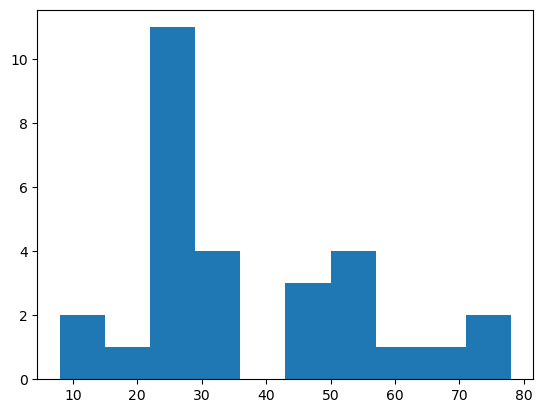

In [38]:
plt.hist(df_SyntheticTry['Age'])

In [39]:
# Since the p-value is greater than .15 and for the purposes of the example the data is normally distributed

from scipy.stats import normaltest
s,p=normaltest(df_SyntheticTry['Age'])
print('The p-value of the test is', p)

The p-value of the test is 0.25374346025384853


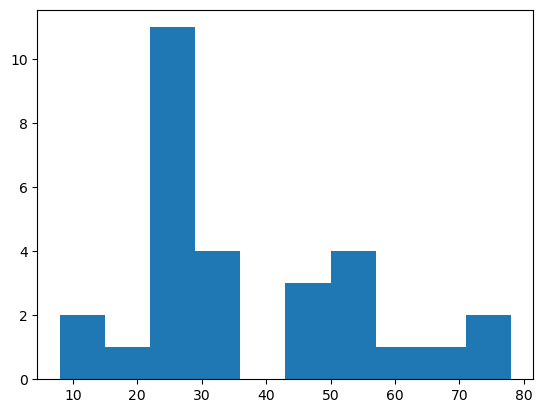

In [40]:
ax = plt.hist(df_SyntheticTry['Age'])

37.310344827586206
18.270005567822793
[78.         77.29292929 76.58585859 75.87878788 75.17171717 74.46464646
 73.75757576 73.05050505 72.34343434 71.63636364 70.92929293 70.22222222
 69.51515152 68.80808081 68.1010101  67.39393939 66.68686869 65.97979798
 65.27272727 64.56565657 63.85858586 63.15151515 62.44444444 61.73737374
 61.03030303 60.32323232 59.61616162 58.90909091 58.2020202  57.49494949
 56.78787879 56.08080808 55.37373737 54.66666667 53.95959596 53.25252525
 52.54545455 51.83838384 51.13131313 50.42424242 49.71717172 49.01010101
 48.3030303  47.5959596  46.88888889 46.18181818 45.47474747 44.76767677
 44.06060606 43.35353535 42.64646465 41.93939394 41.23232323 40.52525253
 39.81818182 39.11111111 38.4040404  37.6969697  36.98989899 36.28282828
 35.57575758 34.86868687 34.16161616 33.45454545 32.74747475 32.04040404
 31.33333333 30.62626263 29.91919192 29.21212121 28.50505051 27.7979798
 27.09090909 26.38383838 25.67676768 24.96969697 24.26262626 23.55555556
 22.84848485 2

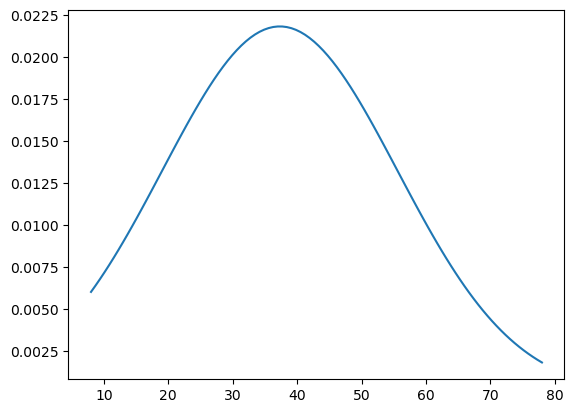

In [41]:
#Compare.SyntheticCount.plot(kind='bar', color='red', ax=ax, width=width, position = 1)
#Compare.RealCount.plot(kind='bar', color='blue', ax=ax2, width=width, position = 0)

import statistics
from scipy.stats import norm


m = statistics.mean(df_SyntheticTry['Age'])
sd = statistics.stdev(df_SyntheticTry['Age'])
print(m)
print(sd)

m1 = df_SyntheticTry['Age'].max()
m2 = df_SyntheticTry['Age'].min()

x_axis = np.linspace(m1, m2, 100)
print(x_axis)
plt.plot(x_axis, norm.pdf(x_axis, m, sd))
#plt.hist(df_SyntheticTry['Age'])



In [42]:
random_numbers = np.random.normal(loc = m, scale = sd, size = 30)
print(random_numbers)
SyntheticMade=random_numbers.T


[  4.96586456  41.79131264  35.9354132   39.96977952  36.40525398
  68.20504609  33.21827826  38.65924116  44.05666764  24.02988595
  65.0892525   32.73558723  44.38939996  47.61003712  27.74517074
  41.70038981  35.76974844  22.33381539  65.29357684  46.53537
  25.50115002  45.35695657  56.99713317  27.27043166  74.36281864
 -15.9229926   59.48176179  39.89856116  29.15958719  32.13784298]


In [43]:
predictors = df_SyntheticTry['Age']
target = df_SyntheticTry['Weight']

In [44]:
print(df_SyntheticTry['Weight'])

0     205
1     190
2      85
3     140
4     135
5     115
6     120
7     175
8     205
9     215
10    210
11    145
12    165
13     80
14    215
15    215
16    250
17    190
18    185
19    150
20    230
21    150
22    132
23    140
24     85
25    210
26    250
27    245
28    235
Name: Weight, dtype: int64


In [45]:
#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.3)

In [46]:
print(x_train)

11    72
18    25
20    53
6     34
5     55
26    54
7     78
24    14
23    24
12    33
1     22
14    27
10    67
25    25
17    24
4     45
3     23
19    27
0     56
2     34
Name: Age, dtype: int64


In [47]:
print(y_train)

11    145
18    185
20    230
6     120
5     115
26    250
7     175
24     85
23    140
12    165
1     190
14    215
10    210
25    210
17    190
4     135
3     140
19    150
0     205
2      85
Name: Weight, dtype: int64


In [48]:
print(np.array(y_train).reshape(1,-1))
print(np.array(x_train).reshape(1,-1))

[[145 185 230 120 115 250 175  85 140 165 190 215 210 210 190 135 140 150
  205  85]]
[[72 25 53 34 55 54 78 14 24 33 22 27 67 25 24 45 23 27 56 34]]


In [49]:
# Train gave out two different size arrays for some reason

y_train1 = [[190], [250], [175],  [85],  [85], [145], [250], [165], [205], [140], [210], [132], [150], [245], [205], [120], [190], [140], [215], [135]]
x_train1 = [[24], [54], [78],  [34],  [14], [72], [29], [33], [56], [24], [19], [27], [49], [45], [34], [22], [23], [28], [45], [23]]

In [50]:
linreg = LinearRegression()

linreg.fit(np.array(x_train1), np.array(y_train1))
#linreg.score(x_train., y_train)


LinearRegression()

In [51]:
intercept=linreg.intercept_
print(intercept)

[143.1406246]


In [52]:
coeff = linreg.coef_
print(coeff)

[[0.77651775]]


In [53]:
print(df_SyntheticTry.mean())
print(df_SyntheticTry.max())
print(df_SyntheticTry.min())

Age        37.310345
Weight    174.724138
dtype: float64
Name      max
Age        78
Weight    250
dtype: object
Name      Andrew Fox
Age                8
Weight            80
dtype: object


C:\Users\decla\AppData\Local\Temp\ipykernel_30000\200795286.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_SyntheticTry.mean())


In [54]:
x_value = df_SyntheticTry['Age']
y_value = 143.1406246 + 0.77651775*x_value
print(x_value)
print(y_value)

0     56
1     22
2     34
3     23
4     45
5     55
6     34
7     78
8     45
9     23
10    67
11    72
12    33
13     8
14    27
15    28
16    29
17    24
18    25
19    27
20    53
21    62
22    19
23    24
24    14
25    25
26    54
27    49
28    27
Name: Age, dtype: int64
0     186.625619
1     160.224015
2     169.542228
3     161.000533
4     178.083923
5     185.849101
6     169.542228
7     203.709009
8     178.083923
9     161.000533
10    195.167314
11    199.049903
12    168.765710
13    149.352767
14    164.106604
15    164.883122
16    165.659639
17    161.777051
18    162.553568
19    164.106604
20    184.296065
21    191.284725
22    157.894462
23    161.777051
24    154.011873
25    162.553568
26    185.072583
27    181.189994
28    164.106604
Name: Age, dtype: float64


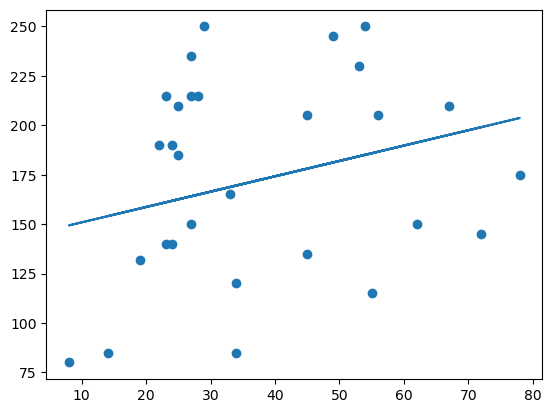

In [55]:
plt.scatter(df_SyntheticTry['Age'], df_SyntheticTry['Weight'])
plt.plot(x_value, y_value)

In [56]:
print(SyntheticMade)

[  4.96586456  41.79131264  35.9354132   39.96977952  36.40525398
  68.20504609  33.21827826  38.65924116  44.05666764  24.02988595
  65.0892525   32.73558723  44.38939996  47.61003712  27.74517074
  41.70038981  35.76974844  22.33381539  65.29357684  46.53537
  25.50115002  45.35695657  56.99713317  27.27043166  74.36281864
 -15.9229926   59.48176179  39.89856116  29.15958719  32.13784298]


In [57]:
SyntheticMade1 = 143.1406246 + 0.77651775*SyntheticMade
print(SyntheticMade1)

[146.99670658 175.59232066 171.0451108  174.17786786 171.40995051
 196.10305353 168.9352073  173.16021157 177.35140903 161.80025757
 193.6835845  168.56038914 177.60978158 180.1106635  164.68524216
 175.52171747 170.91646918 160.48322867 193.84224598 179.27616541
 162.94272023 178.36110646 187.3999102  164.31659883 200.88467321
 130.77613821 189.32926843 174.12256554 165.78356164 168.09623012]


In [58]:
df_SyntheticMade = pd.DataFrame(SyntheticMade, columns = ['Age'])

In [59]:
df_SyntheticMade1 = pd.DataFrame(SyntheticMade1, columns = ['Weight'])

In [60]:
Synthetic = pd.merge(df_SyntheticMade, df_SyntheticMade1,left_index=True, right_index=True)


In [61]:
Synthetic.head()

,Age,Weight
0,4.965865,146.996707
1,41.791313,175.592321
2,35.935413,171.045111
3,39.969780,174.177868
4,36.405254,171.409951


## Are you convinced of its utility and privacy guarantees that it provide to individuals? 
### About the data


### Actions taken
In order to analysis the privacy that synthetic data provides individuals, we want through the process to see if we could "find someone." We thought that we could analyze the data and see if there is a unique point where we can find a person. To do this, we narrowed down the same compare dataframe that was used earlier to Suicides, Homicides, and Overdoses. We narrowed down to those variables because they had the smallest count total and we thought that we would have the best chance find someone in those services. We then looked at the oldest and younest ages of each service to decide if we had any information on someone we could find someone. After doing this we came to the conclusion that we are unable to find a person in the dataset and are convinced of the privacy sythetic data provides for individuals. To analysis the utility of the synthetic data, we used correlation between real overdose data and the sythetic data we have in the selection below. 

In [62]:
# Going to focus in on Suicides, Overdoses, and Homicides in all of Alleghany County since they have the smallest value and that might be where we can predict the most
# This is our way for testing if Synthetic Data is protecting people's privacy


SHO_Compare = Compare[(Compare['Service'] == 'Suicides') | (Compare['Service'] == 'Homicides') | (Compare['Service'] == 'Overdoses')] 
SHO_Compare

,Service,SyntheticCount,RealCount
19,Overdoses,1319,724
20,Suicides,1177,197
21,Homicides,172,129


<Axes: xlabel='Service'>

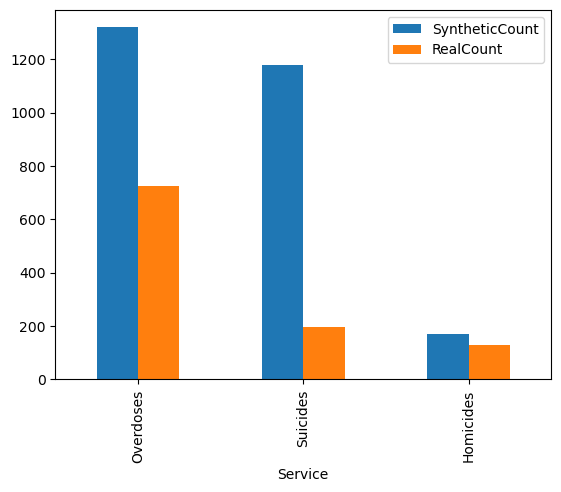

In [63]:
SHO_Compare.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'bar')

In [64]:
# Looking deeper into Synthetic Data

df_ServiceRecordsSynthetic.isna().sum() 

# There is no blank values

MCI_UNIQ_ID              0
CALDR_YR                 0
DATE_OF_EVENT            0
service                  0
GEO_AREA           7116134
age                      0
DOB                7116134
DOD                7116134
GENDER                   0
RACE                     0
ETHNICITY                0
MARITAL_STATUS           0
EDUCATION_LEVEL          0
dtype: int64

In [65]:
# New Synthetic Data frame of 
SHO_deeperlook = df_ServiceRecordsSynthetic[(df_ServiceRecordsSynthetic['service'] == 'Suicides') | (df_ServiceRecordsSynthetic['service'] == 'Homicides') | (df_ServiceRecordsSynthetic['service'] == 'Overdoses')] 


In [66]:
SHO_deeperlook.head()
year = SHO_deeperlook['CALDR_YR']
year.max()
year.min()
# All values in Synthetic data correspond to 2021


2021

In [67]:
# Breaking down each dataframe into type of the service

SHO_deeperlook.head()
Suicides_deeperlook = SHO_deeperlook[(SHO_deeperlook['service'] == 'Suicides')]
Homicides_deeperlook = SHO_deeperlook[(SHO_deeperlook['service'] == 'Homicides')]
Overdoses_deeperlook = SHO_deeperlook[(SHO_deeperlook['service'] == 'Overdoses')]

Text(0.5, 0, 'Ages')

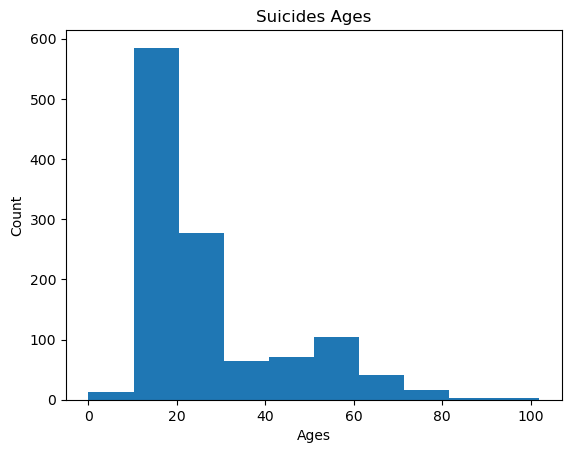

In [68]:
# Suicides 

#Suicides_deeperlook.head()

plt.hist(Suicides_deeperlook['age'])
plt.title('Suicides Ages')
plt.ylabel('Count')
plt.xlabel('Ages')

In [69]:
# Figuring out what the min/max value is 

Suicides_deeperlook.max()
Suicides_deeperlook.min()


MCI_UNIQ_ID                                      730
CALDR_YR                                        2021
DATE_OF_EVENT                             01/31/2021
service                                     Suicides
GEO_AREA                                         NaN
age                                                0
DOB                                              NaN
DOD                                              NaN
GENDER                                        1~Male
RACE                                         1~White
ETHNICITY                          1~Hispanic/Latinx
MARITAL_STATUS                1~Single-Never Married
EDUCATION_LEVEL    1-5~Elementary School (Grade 1-5)
dtype: object

In [70]:
# Looking at the top and bottom of the dataset

Oldest_to_youngest = Suicides_deeperlook.sort_values(by = 'age', ascending = False)
print(Oldest_to_youngest.head(5))
print(Oldest_to_youngest.tail(5))


         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT   service  GEO_AREA  age  DOB  \
7115331       172184      2021    09/30/2021  Suicides       NaN  102  NaN   
7115614       296899      2021    06/30/2021  Suicides       NaN   99  NaN   
7115598       291171      2021    04/30/2021  Suicides       NaN   98  NaN   
7115776       371341      2021    09/30/2021  Suicides       NaN   91  NaN   
7115407       204296      2021    03/31/2021  Suicides       NaN   91  NaN   

         DOD    GENDER                      RACE              ETHNICITY  \
7115331  NaN  2~Female                   1~White  2~Not Hispanic/Latinx   
7115614  NaN    1~Male                   1~White  2~Not Hispanic/Latinx   
7115598  NaN    1~Male                   1~White             99~Unknown   
7115776  NaN    1~Male                   1~White  2~Not Hispanic/Latinx   
7115407  NaN    1~Male  2~Black/African American  2~Not Hispanic/Latinx   

                 MARITAL_STATUS                    EDUCATION_LEVEL  
7115331  1~

In [71]:
# Looking at the top and bottom of the dataset

Oldest_to_youngest = Suicides_deeperlook.sort_values(by = 'age', ascending = False)
print(Oldest_to_youngest.head(5))
print(Oldest_to_youngest.tail(5))



         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT   service  GEO_AREA  age  DOB  \
7115331       172184      2021    09/30/2021  Suicides       NaN  102  NaN   
7115614       296899      2021    06/30/2021  Suicides       NaN   99  NaN   
7115598       291171      2021    04/30/2021  Suicides       NaN   98  NaN   
7115776       371341      2021    09/30/2021  Suicides       NaN   91  NaN   
7115407       204296      2021    03/31/2021  Suicides       NaN   91  NaN   

         DOD    GENDER                      RACE              ETHNICITY  \
7115331  NaN  2~Female                   1~White  2~Not Hispanic/Latinx   
7115614  NaN    1~Male                   1~White  2~Not Hispanic/Latinx   
7115598  NaN    1~Male                   1~White             99~Unknown   
7115776  NaN    1~Male                   1~White  2~Not Hispanic/Latinx   
7115407  NaN    1~Male  2~Black/African American  2~Not Hispanic/Latinx   

                 MARITAL_STATUS                    EDUCATION_LEVEL  
7115331  1~

In [72]:
#Suicides_deeperlook = SHO_deeperlook[(SHO_deeperlook['service'] == 'Suicides')]

Suicides_extremeAges = Suicides_deeperlook[(Suicides_deeperlook['age']>=80) | (Suicides_deeperlook['age']<=10)]
Suicides_extremeAges.describe()


,MCI_UNIQ_ID,CALDR_YR,GEO_AREA,age,DOB,DOD
count,22.000000,22.0,0.0,22.000000,0.0,0.0
mean,282344.727273,2021.0,NaN,39.000000,NaN,NaN
std,119451.308939,0.0,NaN,43.385317,NaN,NaN
min,57517.000000,2021.0,NaN,0.000000,NaN,NaN
25%,182559.500000,2021.0,NaN,3.000000,NaN,NaN
50%,294035.000000,2021.0,NaN,8.000000,NaN,NaN
75%,387726.250000,2021.0,NaN,82.500000,NaN,NaN
max,485444.000000,2021.0,NaN,102.000000,NaN,NaN


Text(0, 0.5, 'Count')

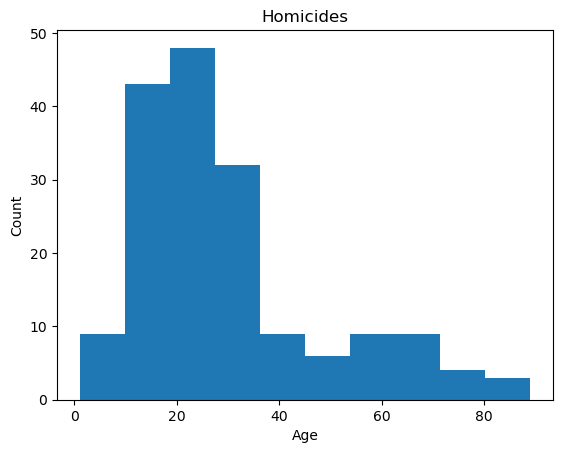

In [73]:
# Homicides

plt.hist(Homicides_deeperlook['age'])
plt.title('Homicides')
plt.xlabel('Age')
plt.ylabel('Count')

In [74]:
# Figuring out what the min/max value is 

Homicides_deeperlook.max()
Homicides_deeperlook.min()
# Youngest age 1, oldest 89

MCI_UNIQ_ID                                     2650
CALDR_YR                                        2021
DATE_OF_EVENT                             01/31/2021
service                                    Homicides
GEO_AREA                                         NaN
age                                                1
DOB                                              NaN
DOD                                              NaN
GENDER                                        1~Male
RACE                                         1~White
ETHNICITY                          1~Hispanic/Latinx
MARITAL_STATUS                1~Single-Never Married
EDUCATION_LEVEL    1-5~Elementary School (Grade 1-5)
dtype: object

In [75]:
# Looking at the top and bottom of the dataset

Oldest_to_youngest1 = Homicides_deeperlook.sort_values(by = 'age', ascending = False)
print(Oldest_to_youngest1.head(5))
print(Oldest_to_youngest1.tail(5))


        MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT    service  GEO_AREA  age  DOB  \
159131       231991      2021    04/30/2021  Homicides       NaN   89  NaN   
159214       444435      2021    08/31/2021  Homicides       NaN   87  NaN   
159168       352385      2021    12/31/2021  Homicides       NaN   87  NaN   
159198       406002      2021    12/31/2021  Homicides       NaN   79  NaN   
159207       421346      2021    06/30/2021  Homicides       NaN   77  NaN   

        DOD    GENDER                      RACE              ETHNICITY  \
159131  NaN  2~Female                   1~White  2~Not Hispanic/Latinx   
159214  NaN    1~Male  2~Black/African American  2~Not Hispanic/Latinx   
159168  NaN  2~Female  2~Black/African American  2~Not Hispanic/Latinx   
159198  NaN  2~Female                   1~White  2~Not Hispanic/Latinx   
159207  NaN  2~Female                99~Unknown  2~Not Hispanic/Latinx   

                MARITAL_STATUS                    EDUCATION_LEVEL  
159131  1~Single-N

Text(0.5, 0, 'Age')

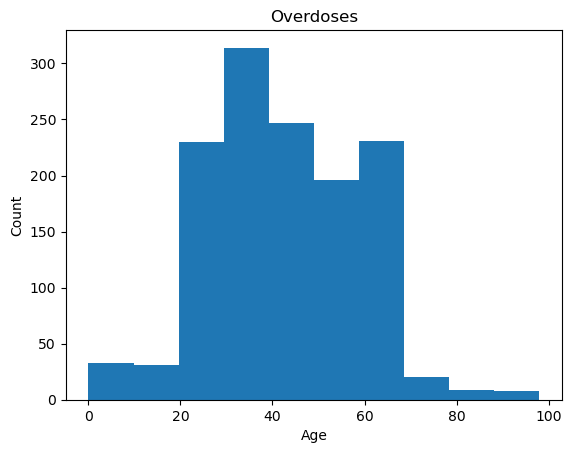

In [76]:
# Overdoses

plt.hist(Overdoses_deeperlook['age'])
plt.title('Overdoses')
plt.ylabel('Count')
plt.xlabel('Age')

In [77]:
# Figuring out what the min/max value is 

Overdoses_deeperlook.max()
Overdoses_deeperlook.min()
# Youngest age 1, oldest 89

MCI_UNIQ_ID                                      272
CALDR_YR                                        2021
DATE_OF_EVENT                             01/31/2021
service                                    Overdoses
GEO_AREA                                         NaN
age                                                0
DOB                                              NaN
DOD                                              NaN
GENDER                                        1~Male
RACE                                         1~White
ETHNICITY                          1~Hispanic/Latinx
MARITAL_STATUS                1~Single-Never Married
EDUCATION_LEVEL    1-5~Elementary School (Grade 1-5)
dtype: object

In [78]:
# Looking at the top and bottom of the dataset

Oldest_to_youngest2 = Overdoses_deeperlook.sort_values(by = 'age', ascending = False)
print(Oldest_to_youngest2.head(5))
print(Oldest_to_youngest2.tail(5))

         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT    service  GEO_AREA  age  DOB  \
7059965       155989      2021    01/31/2021  Overdoses       NaN   98  NaN   
7060111       207995      2021    05/31/2021  Overdoses       NaN   94  NaN   
7059800        84567      2021    05/31/2021  Overdoses       NaN   94  NaN   
7059824        98274      2021    02/28/2021  Overdoses       NaN   93  NaN   
7059920       136477      2021    07/31/2021  Overdoses       NaN   92  NaN   

         DOD    GENDER                      RACE              ETHNICITY  \
7059965  NaN    1~Male                   1~White  2~Not Hispanic/Latinx   
7060111  NaN    1~Male                   1~White  2~Not Hispanic/Latinx   
7059800  NaN  2~Female                   1~White  2~Not Hispanic/Latinx   
7059824  NaN  2~Female                   1~White  2~Not Hispanic/Latinx   
7059920  NaN    1~Male  2~Black/African American  2~Not Hispanic/Latinx   

                 MARITAL_STATUS                EDUCATION_LEVEL  
7059965  

In [79]:
# Deeper look at data - Need to figure out later how this helps

mytable = Suicides_deeperlook.groupby(['GENDER','RACE','ETHNICITY','MARITAL_STATUS','EDUCATION_LEVEL']).size()
print(mytable)

GENDER    RACE     ETHNICITY              MARITAL_STATUS          EDUCATION_LEVEL                  
1~Male    1~White  1~Hispanic/Latinx      1~Single-Never Married  9-12~High School (grade 9-12)         1
                   2~Not Hispanic/Latinx  1~Single-Never Married  1-5~Elementary School (Grade 1-5)    24
                                                                  6-8~Middle School (Grade 6-8)         8
                                                                  9-12~High School (grade 9-12)        70
                                                                  99~Unknown                           48
                                                                                                       ..
99~Other  1~White  99~Unknown             1~Single-Never Married  6-8~Middle School (Grade 6-8)         1
                                                                  99~Unknown                            1
                                                    

## Comparison of Overdose Data with Synthetic Data using correlation

Using the new Overdose Data and the Overdose Synthetic Data from before we wanted to compute a correlation matrix of both. To this, we had to convert all our data to numerical data. To do this we had to run a lot of code to clean the data and replace the values. After this we were able to compute a corrleation matrix of both the synthetic data and real data. Some of the variables in both dataframes are not the same, so it is a bit tough to get a great read on the what the correlation matrix means in terms of utility. 
Our next step, was to look deeper into the real Overdose data. To do this we created a subset of the data of the top five types of substances used in the overdose. We also have to convert those substance names to a numeric form. After this we ran a linear regression to predict the type of substance in a overdose. This type of analysis could be used to predict the type of substance a person is on to give them the resources they need. This type of analysis could may marginalize a group but could be useful. 
The last thing we did was looking at the sythetic Combined dataframe from before. This dataframe has Overdoses, Homicides, and Suicides. We had to clean the data similarly as we had to before. After cleaning the data, we went through a logistic regression of the 3 variables. At a time, we made 2 of the three variables 0 and one 1. This logistic regression would help group types of people that may need a certain type of service. This could help workers know the right questions to ask and how to figure out how to help people. The regression should how homicides are different from Overdoses and Suicides. But Overdoses and Suicides are very similar. 

In [80]:
df_OverdoseReal.head()

,_id,manner_of_death,age,sex,race,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,case_year
0,6989080,Accident,35,F,W,Alcohol,Codeine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15216,2007
1,6989081,Accident,57,M,W,Diazepam,Fentanyl,Methadone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15224,2007
2,6989082,Accident,29,M,W,Cocaine,Fentanyl,Morphine,Oxycodone,NaN,NaN,NaN,NaN,NaN,NaN,15226,2007
3,6989083,Accident,60,F,W,Cocaine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15220,2007
4,6989084,Accident,45,M,W,Diazepam,Hydrocodone,Mirtazapine,Oxycodone,Trazodone,NaN,NaN,NaN,NaN,NaN,15068,2007


In [81]:
Overdoses_deeperlook.head()

,MCI_UNIQ_ID,CALDR_YR,DATE_OF_EVENT,service,GEO_AREA,age,DOB,DOD,GENDER,RACE,ETHNICITY,MARITAL_STATUS,EDUCATION_LEVEL
7059603,272,2021,12/31/2021,Overdoses,NaN,43,NaN,NaN,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
7059604,621,2021,01/31/2021,Overdoses,NaN,36,NaN,NaN,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
7059605,1798,2021,09/30/2021,Overdoses,NaN,34,NaN,NaN,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
7059606,2089,2021,11/30/2021,Overdoses,NaN,3,NaN,NaN,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
7059607,2131,2021,09/30/2021,Overdoses,NaN,65,NaN,NaN,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,99~Unknown


In [82]:
df_OverdoseReal.isna().sum()

_id                   0
manner_of_death       0
age                   0
sex                   0
race                  2
combined_od1          0
combined_od2       1303
combined_od3       3114
combined_od4       4840
combined_od5       5940
combined_od6       6491
combined_od7       6683
combined_od8       6784
combined_od9       6808
combined_od10      6820
incident_zip        182
case_year             0
dtype: int64

In [83]:
# Could look at highest in each category

df_OverdoseReal['combined_od1'].value_counts()

Fentanyl                    1830
Cocaine                     1443
Alcohol                     1036
Heroin                       543
Alprazolam                   496
                            ... 
Gama-Hydroxybutyric Acid       1
Venlafaxine                    1
Nordiazepam                    1
Topiramate                     1
Barbituates                    1
Name: combined_od1, Length: 114, dtype: int64

In [84]:
df_Overdoses = df_ServiceRecordsSynthetic1[(df_ServiceRecordsSynthetic1['service']== 'Overdoses')]
df_Overdoses.head()

,service,age,GENDER,RACE,ETHNICITY,MARITAL_STATUS,EDUCATION_LEVEL
7059603,Overdoses,43,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
7059604,Overdoses,36,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
7059605,Overdoses,34,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
7059606,Overdoses,3,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
7059607,Overdoses,65,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,99~Unknown


In [85]:
df_Overdoses.nunique()

service             1
age                89
GENDER              3
RACE                6
ETHNICITY           3
MARITAL_STATUS      7
EDUCATION_LEVEL     8
dtype: int64

In [86]:
mytable = df_Overdoses.groupby(['GENDER','RACE','ETHNICITY','MARITAL_STATUS','EDUCATION_LEVEL']).size()
print(mytable)

GENDER    RACE        ETHNICITY              MARITAL_STATUS          EDUCATION_LEVEL                      
1~Male    1~White     1~Hispanic/Latinx      1~Single-Never Married  9-12~High School (grade 9-12)             1
                                                                     99~Unknown                                2
                                                                     GED~High School Diploma/GED Completed     1
                                             5~Separated             GRAD~Graduate Degree                      1
                      2~Not Hispanic/Latinx  1~Single-Never Married  1-5~Elementary School (Grade 1-5)        33
                                                                                                              ..
2~Female  99~Unknown  2~Not Hispanic/Latinx  1~Single-Never Married  9-12~High School (grade 9-12)             1
                                                                     99~Unknown                       

In [87]:
mytable1 = df_OverdoseReal.groupby(['_id','manner_of_death','age','sex','race','combined_od1']).size()
print(mytable1)

_id      manner_of_death  age  sex  race  combined_od1
6989080  Accident         35   F    W     Alcohol         1
6989081  Accident         57   M    W     Diazepam        1
6989082  Accident         29   M    W     Cocaine         1
6989083  Accident         60   F    W     Cocaine         1
6989084  Accident         45   M    W     Diazepam        1
                                                         ..
6995895  Accident         55   M    W     Fentanyl        1
6995896  Accident         35   M    W     Fentanyl        1
6995897  Accident         66   M    B     Fentanyl        1
6995898  Accident         62   M    B     Alcohol         1
6995899  Accident         27   M    W     Cocaine         1
Length: 6818, dtype: int64


In [88]:
df_Overdoses.describe()

,age
count,1319.000000
mean,42.628506
std,16.050990
min,0.000000
25%,30.000000
50%,41.000000
75%,56.000000
max,98.000000


In [89]:
df_ServiceRecordsSynthetic2 = pd.read_csv(ServiceRecords, usecols = ['GENDER','RACE','ETHNICITY','MARITAL_STATUS'])
df_ServiceRecordsSynthetic2.head()

,GENDER,RACE,ETHNICITY,MARITAL_STATUS
0,1~Male,1~White,99~Unknown,99~Unknown
1,1~Male,1~White,99~Unknown,99~Unknown
2,1~Male,1~White,99~Unknown,99~Unknown
3,1~Male,1~White,99~Unknown,99~Unknown
4,1~Male,1~White,99~Unknown,99~Unknown


In [90]:
def extract_before_tilde(cell_value):
    return cell_value.split('~')[0]

df_extracted = df_ServiceRecordsSynthetic2.applymap(extract_before_tilde)
print(df_extracted)

        GENDER RACE ETHNICITY MARITAL_STATUS
0            1    1        99             99
1            1    1        99             99
2            1    1        99             99
3            1    1        99             99
4            1    1        99             99
...        ...  ...       ...            ...
7116129      1    1        99             99
7116130      2    1        99              1
7116131      1    1        99              1
7116132      1    1         2              4
7116133      1    1        99              1

[7116134 rows x 4 columns]


In [91]:
df_OverdoseReal.head()
df_OverdoseReal['sex'] = df_OverdoseReal['sex'].replace({'F':1, 'M':0})

In [92]:
df_OverdoseReal.head()

,_id,manner_of_death,age,sex,race,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,case_year
0,6989080,Accident,35,1,W,Alcohol,Codeine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15216,2007
1,6989081,Accident,57,0,W,Diazepam,Fentanyl,Methadone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15224,2007
2,6989082,Accident,29,0,W,Cocaine,Fentanyl,Morphine,Oxycodone,NaN,NaN,NaN,NaN,NaN,NaN,15226,2007
3,6989083,Accident,60,1,W,Cocaine,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15220,2007
4,6989084,Accident,45,0,W,Diazepam,Hydrocodone,Mirtazapine,Oxycodone,Trazodone,NaN,NaN,NaN,NaN,NaN,15068,2007


In [93]:
df_OverdoseReal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              6820 non-null   int64  
 1   manner_of_death  6820 non-null   object 
 2   age              6820 non-null   int64  
 3   sex              6820 non-null   int64  
 4   race             6818 non-null   object 
 5   combined_od1     6820 non-null   object 
 6   combined_od2     5517 non-null   object 
 7   combined_od3     3706 non-null   object 
 8   combined_od4     1980 non-null   object 
 9   combined_od5     880 non-null    object 
 10  combined_od6     329 non-null    object 
 11  combined_od7     137 non-null    object 
 12  combined_od8     36 non-null     object 
 13  combined_od9     12 non-null     object 
 14  combined_od10    0 non-null      float64
 15  incident_zip     6638 non-null   object 
 16  case_year        6820 non-null   int64  
dtypes: float64(1),

In [94]:
df_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7116134 entries, 0 to 7116133
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   GENDER          object
 1   RACE            object
 2   ETHNICITY       object
 3   MARITAL_STATUS  object
dtypes: object(4)
memory usage: 217.2+ MB


In [95]:
df_extracted.head()

,GENDER,RACE,ETHNICITY,MARITAL_STATUS
0,1,1,99,99
1,1,1,99,99
2,1,1,99,99
3,1,1,99,99
4,1,1,99,99


In [96]:
#Compare3 = pd.merge(df_extracted, df_Age, how='left')
#Compare3.head()
df_Age.head()

df_extracted = pd.merge(df_extracted, df_Age, left_index=True, right_index=True)
df_extracted.head()

,GENDER,RACE,ETHNICITY,MARITAL_STATUS,age
0,1,1,99,99,35
1,1,1,99,99,57
2,1,1,99,99,29
3,1,1,99,99,60
4,1,1,99,99,45


In [97]:
df_extracted['GENDER'] = df_extracted['GENDER'].astype(int)
df_extracted['RACE'] = df_extracted['RACE'].astype(int)
df_extracted['ETHNICITY'] = df_extracted['ETHNICITY'].astype(int)
df_extracted['MARITAL_STATUS'] = df_extracted['MARITAL_STATUS'].astype(int)
df_extracted.head()
df_extracted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6820 entries, 0 to 6819
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   GENDER          6820 non-null   int32
 1   RACE            6820 non-null   int32
 2   ETHNICITY       6820 non-null   int32
 3   MARITAL_STATUS  6820 non-null   int32
 4   age             6820 non-null   int64
dtypes: int32(4), int64(1)
memory usage: 213.1 KB


In [98]:
print(df_extracted.corr())

                  GENDER      RACE  ETHNICITY  MARITAL_STATUS       age
GENDER          1.000000 -0.012453   0.083548        0.070453 -0.002791
RACE           -0.012453  1.000000  -0.069804        0.060697 -0.010930
ETHNICITY       0.083548 -0.069804   1.000000        0.033161  0.000713
MARITAL_STATUS  0.070453  0.060697   0.033161        1.000000 -0.012999
age            -0.002791 -0.010930   0.000713       -0.012999  1.000000


In [99]:
# Could look at highest in each category

df_OverdoseReal['combined_od1'].value_counts()
df_OverdoseReal.nunique()


_id                6820
manner_of_death       1
age                  75
sex                   2
race                  8
combined_od1        114
combined_od2        121
combined_od3        107
combined_od4         99
combined_od5         88
combined_od6         70
combined_od7         53
combined_od8         24
combined_od9          9
combined_od10         0
incident_zip        369
case_year            17
dtype: int64

In [100]:
#df_OverdoseReal['race'] = df_OverdoseReal['race'].replace({'W':1, 'B':2, 'H':3,'O':4,'A':5,'I':6,'U':7,'M':8})
#df_OverdoseReal['combined_od1'] = df_OverdoseReal['combined_od1'].replace({'Fentanyl':1, 'Cocaine':2, 'Alcohol':3,'Heroin':3,'Alprazolam':4,'I':5,'U':6,'M':7})
#df_OverdoseReal.head()

In [101]:
df_OverdoseTop5 = df_OverdoseReal[(df_OverdoseReal['combined_od1'] == 'Fentanyl') | (df_OverdoseReal['combined_od1'] == 'Cocaine') | (df_OverdoseReal['combined_od1'] == 'Alcohol')| (df_OverdoseReal['combined_od1'] == 'Heroin')| (df_OverdoseReal['combined_od1'] == 'Alprazolam')] 
df_OverdoseTop = df_OverdoseTop5[['age','sex','race','combined_od1']]
df_OverdoseTop.head()
df_OverdoseTop.info()
df_OverdoseTop.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5348 entries, 0 to 6819
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           5348 non-null   int64 
 1   sex           5348 non-null   int64 
 2   race          5347 non-null   object
 3   combined_od1  5348 non-null   object
dtypes: int64(2), object(2)
memory usage: 208.9+ KB


,age,sex,race,combined_od1
0,35,1,W,Alcohol
2,29,0,W,Cocaine
3,60,1,W,Cocaine
5,23,0,W,Alcohol
6,24,0,W,Alprazolam


In [102]:
df_OverdoseTop['race'] = df_OverdoseTop['race'].replace({'W':1, 'B':2, 'H':3,'O':4,'A':5,'I':6,'U':7,'M':8})
df_OverdoseTop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5348 entries, 0 to 6819
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5348 non-null   int64  
 1   sex           5348 non-null   int64  
 2   race          5347 non-null   float64
 3   combined_od1  5348 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 208.9+ KB


C:\Users\decla\AppData\Local\Temp\ipykernel_30000\1057739751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OverdoseTop['race'] = df_OverdoseTop['race'].replace({'W':1, 'B':2, 'H':3,'O':4,'A':5,'I':6,'U':7,'M':8})


In [103]:
df_OverdoseTop['race'] = df_OverdoseTop['race'].replace({'W':5457, 'B':1286, 'H':34,'O':16,'A':12,'I':5,'U':4,'M':4})
df_OverdoseTop['combined_od1'] = df_OverdoseTop['combined_od1'].replace({'Fentanyl':1, 'Cocaine':2, 'Alcohol':3,'Heroin':4,'Alprazolam':5})

C:\Users\decla\AppData\Local\Temp\ipykernel_30000\2209579705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OverdoseTop['race'] = df_OverdoseTop['race'].replace({'W':5457, 'B':1286, 'H':34,'O':16,'A':12,'I':5,'U':4,'M':4})
C:\Users\decla\AppData\Local\Temp\ipykernel_30000\2209579705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OverdoseTop['combined_od1'] = df_OverdoseTop['combined_od1'].replace({'Fentanyl':1, 'Cocaine':2, 'Alcohol':3,'Heroin':4,'Alprazolam':5})


In [104]:
df_OverdoseTop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5348 entries, 0 to 6819
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5348 non-null   int64  
 1   sex           5348 non-null   int64  
 2   race          5347 non-null   float64
 3   combined_od1  5348 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 208.9 KB


In [105]:
print(df_OverdoseTop.corr())

                   age       sex      race  combined_od1
age           1.000000 -0.029178  0.135404     -0.066282
sex          -0.029178  1.000000  0.000470      0.004929
race          0.135404  0.000470  1.000000     -0.127603
combined_od1 -0.066282  0.004929 -0.127603      1.000000


In [106]:
df_OverdoseTop.head()
#df_OverdoseTop.isna().sum()

,age,sex,race,combined_od1
0,35,1,1.0,3
2,29,0,1.0,2
3,60,1,1.0,2
5,23,0,1.0,3
6,24,0,1.0,5


In [107]:
cols = ['age','sex','race','combined_od1']
selected_df = df_OverdoseTop[cols]
selected_df = selected_df.dropna()


feature_cols = ['age','sex','race']
print(feature_cols)
predictors = selected_df[feature_cols]
target_col = ['combined_od1']
target = selected_df[target_col]
print(target)

['age', 'sex', 'race']
      combined_od1
0                3
2                2
3                2
5                3
6                5
...            ...
6815             1
6816             1
6817             1
6818             3
6819             2

[5347 rows x 1 columns]


In [108]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = .3)

In [109]:
linreg = LinearRegression()

linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)

In [111]:
print(linreg.coef_)
print(linreg.intercept_)

[[-0.00566728 -0.03915098 -0.27246611]]
[2.91771547]


In [113]:
df_ServiceRecordsSynthetic.head()

,MCI_UNIQ_ID,CALDR_YR,DATE_OF_EVENT,service,GEO_AREA,age,DOB,DOD,GENDER,RACE,ETHNICITY,MARITAL_STATUS,EDUCATION_LEVEL
0,1626,2021,01/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
1,1626,2021,02/28/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
2,1626,2021,03/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
3,1626,2021,04/30/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)
4,1626,2021,05/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12)


In [120]:
df_SuicidesOverdoseHomicide = df_ServiceRecordsSynthetic[(df_ServiceRecordsSynthetic['service'] == 'Suicides') | (df_ServiceRecordsSynthetic['service'] == 'Homicides') | (df_ServiceRecordsSynthetic['service'] == 'Overdoses')]
df_SuicidesOverdoseHomicide.head()



,MCI_UNIQ_ID,CALDR_YR,DATE_OF_EVENT,service,GEO_AREA,age,DOB,DOD,GENDER,RACE,ETHNICITY,MARITAL_STATUS,EDUCATION_LEVEL
159069,2650,2021,04/30/2021,Homicides,NaN,28,NaN,NaN,1~Male,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)
159070,7143,2021,05/31/2021,Homicides,NaN,47,NaN,NaN,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married,GRAD COMP~College Degree
159071,13664,2021,05/31/2021,Homicides,NaN,30,NaN,NaN,1~Male,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,GED~High School Diploma/GED Completed
159072,15238,2021,01/31/2021,Homicides,NaN,77,NaN,NaN,2~Female,2~Black/African American,99~Unknown,1~Single-Never Married,GRAD COMP~College Degree
159073,18375,2021,10/31/2021,Homicides,NaN,37,NaN,NaN,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12)


In [121]:
df_AgeService = df_SuicidesOverdoseHomicide[['service','age']]
df_AgeService.head()

,service,age
159069,Homicides,28
159070,Homicides,47
159071,Homicides,30
159072,Homicides,77
159073,Homicides,37


In [116]:
cols = ['GENDER','RACE','ETHNICITY','MARITAL_STATUS']
filter_df = df_SuicidesOverdoseHomicide[cols]
filter_df.head()

,GENDER,RACE,ETHNICITY,MARITAL_STATUS
159069,1~Male,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married
159070,1~Male,2~Black/African American,99~Unknown,1~Single-Never Married
159071,1~Male,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married
159072,2~Female,2~Black/African American,99~Unknown,1~Single-Never Married
159073,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married


In [117]:
def extract_before_tilde(cell_value):
    return cell_value.split('~')[0]

filter_df1 = filter_df.applymap(extract_before_tilde)
print(filter_df1)

        GENDER RACE ETHNICITY MARITAL_STATUS
159069       1    2         2              1
159070       1    2        99              1
159071       1    2         2              1
159072       2    2        99              1
159073       1    1         2              1
...        ...  ...       ...            ...
7116129      1    1        99             99
7116130      2    1        99              1
7116131      1    1        99              1
7116132      1    1         2              4
7116133      1    1        99              1

[2668 rows x 4 columns]


In [151]:
df_SOH = pd.merge(df_AgeService, filter_df1, left_index=True, right_index=True)
df_SOH1 = pd.merge(df_AgeService, filter_df1, left_index=True, right_index=True)
df_SOH2 = pd.merge(df_AgeService, filter_df1, left_index=True, right_index=True)
df_SOH.head()

,service,age,GENDER,RACE,ETHNICITY,MARITAL_STATUS
159069,Homicides,28,1,2,2,1
159070,Homicides,47,1,2,99,1
159071,Homicides,30,1,2,2,1
159072,Homicides,77,2,2,99,1
159073,Homicides,37,1,1,2,1


In [152]:
df_SOH['service'] = df_SOH['service'].replace({'Homicides':1,'Suicides':0, 'Overdoses':0})
df_SOH.head()
df_SOH1['service'] = df_SOH1['service'].replace({'Homicides':0,'Suicides':1, 'Overdoses':0})
df_SOH2['service'] = df_SOH2['service'].replace({'Homicides':0,'Suicides':0, 'Overdoses':1})

In [153]:
feature_cols = ['age', 'GENDER','RACE','ETHNICITY','MARITAL_STATUS']
predictors = df_SOH[feature_cols]
predictors1 = df_SOH1[feature_cols]
predictors2 = df_SOH2[feature_cols]
target = df_SOH.service
target1 = df_SOH1.service
target2 = df_SOH2.service

In [154]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = .3)
x_train1, x_test1, y_train1, y_test1 = train_test_split(predictors1, target1, test_size = .3)
x_train2, x_test2, y_train2, y_test2 = train_test_split(predictors2, target2, test_size = .3)

In [155]:
logreg = LogisticRegression()

logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
logreg.fit(x_train,y_train)
y_pred1 = logreg.predict(x_test1)
logreg.fit(x_train,y_train)
y_pred2 = logreg.predict(x_test2)

In [156]:
accuracy = metrics.accuracy_score(y_test, y_pred)*100
accuracy1 = metrics.accuracy_score(y_test1, y_pred1)*100
accuracy2 = metrics.accuracy_score(y_test1, y_pred1)*100
print('Accuracy of the Logistic Regression Model: {0}%'.format(accuracy))
print('Accuracy of the Logistic Regression Model: {0}%'.format(accuracy1))
print('Accuracy of the Logistic Regression Model: {0}%'.format(accuracy2))

Accuracy of the Logistic Regression Model: 93.88264669163546%
Accuracy of the Logistic Regression Model: 55.68039950062422%
Accuracy of the Logistic Regression Model: 55.68039950062422%


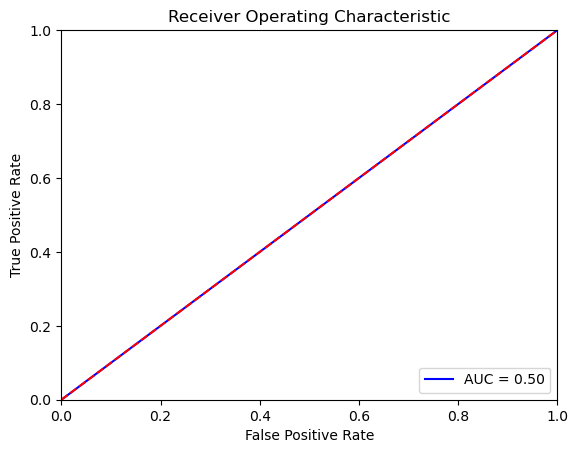

In [136]:

probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

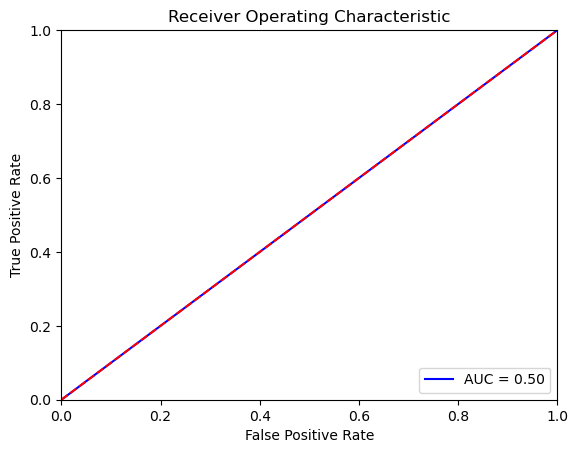

In [162]:

probs = logreg.predict_proba(x_test1)
preds = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test1, y_pred1)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

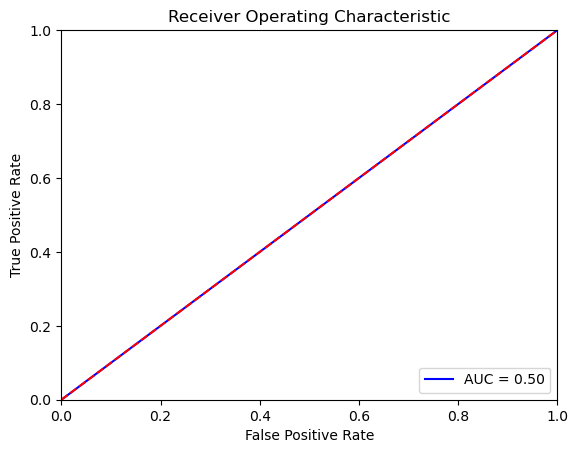

In [163]:

probs = logreg.predict_proba(x_test2)
preds = probs[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_test2, y_pred2)
roc_auc = metrics.auc(fpr2, tpr2)

# method I: plt
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [137]:
tpr

array([0., 1.])

In [164]:
tpr1

array([0., 1.])

In [165]:
tpr2

array([0., 1.])

In [172]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[752,   0],
       [ 49,   0]], dtype=int64)

In [173]:
confusion_matrix1 = metrics.confusion_matrix(y_test1,y_pred1)
confusion_matrix1

array([[446,   0],
       [355,   0]], dtype=int64)

In [174]:
confusion_matrix2 = metrics.confusion_matrix(y_test2,y_pred2)
confusion_matrix2

array([[424,   0],
       [377,   0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Class')

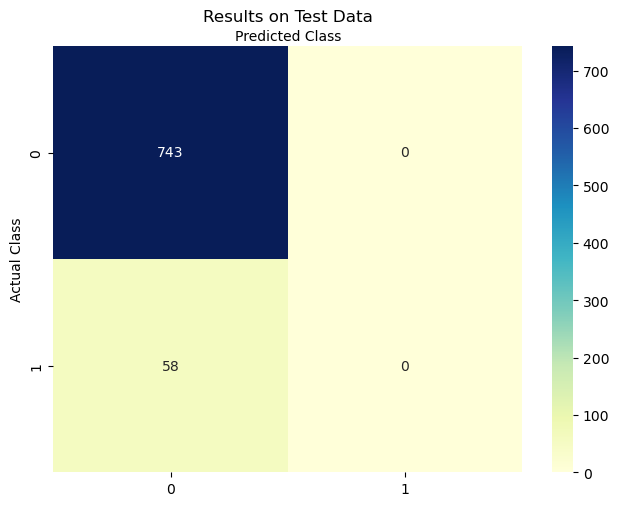

In [140]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

Text(0.5, 427.9555555555555, 'Predicted Class')

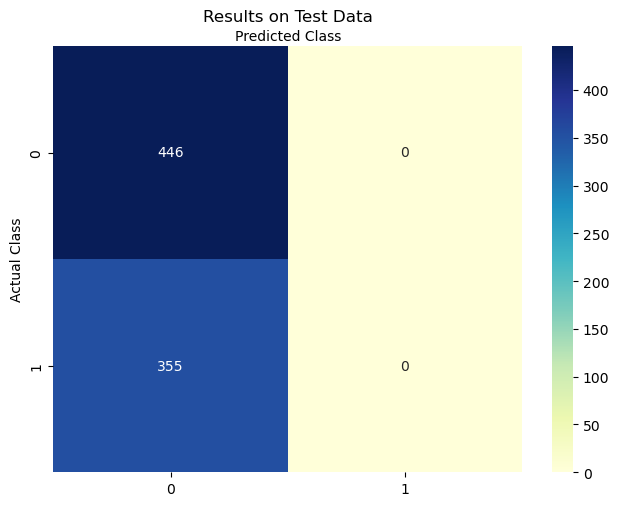

In [175]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix1), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

Text(0.5, 427.9555555555555, 'Predicted Class')

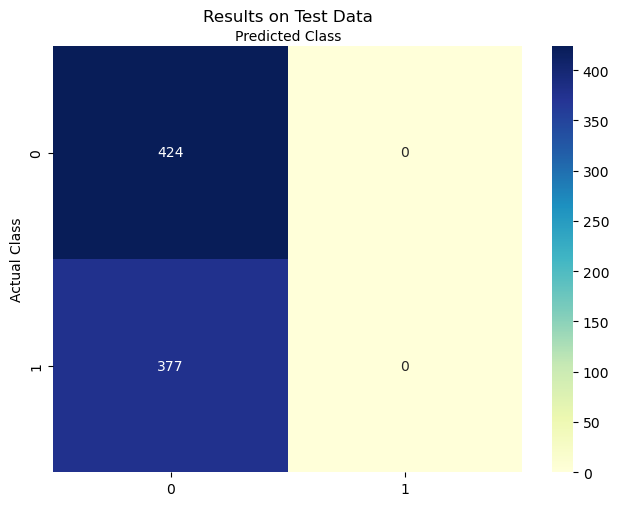

In [176]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix2), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')